In [57]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [58]:
data = pd.read_csv('./data/data.csv')
data.head()

,SYMBOL,ASIANPAINT,HDFC,ITC
0,Date,NaN,NaN,NaN
1,2000-01-03,381.65,293.50,708.50
2,2000-01-04,385.55,304.05,712.35
3,2000-01-05,383.00,292.80,726.20
4,2000-01-06,377.50,296.45,784.30


In [59]:
stocks = data.loc[:,data.columns!="SYMBOL"].pct_change()
date = data.loc[:,data.columns=="SYMBOL"]
stocks = date.join(stocks)
stocks.head()

,SYMBOL,ASIANPAINT,HDFC,ITC
0,Date,NaN,NaN,NaN
1,2000-01-03,NaN,NaN,NaN
2,2000-01-04,0.010219,0.035945,0.005434
3,2000-01-05,-0.006614,-0.037000,0.019443
4,2000-01-06,-0.014360,0.012466,0.080006


In [60]:
# arithmetic mean daily return
# stocks.mean()

In [61]:
data2 = data.loc[:,data.columns!="SYMBOL"]
log_return = np.log(data2/data2.shift(1))
log_return.head()

,ASIANPAINT,HDFC,ITC
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,0.010167,0.035315,0.005419
3,-0.006636,-0.037702,0.019256
4,-0.014464,0.012389,0.076966


# Randomly Generate weights for the assets and Find Sharpe Ratio

In [62]:
print(stocks.columns)

weights = np.array(np.random.random(3))
print('Random Weights:')
print(weights)


print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean() * weights) * 252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['SYMBOL', 'ASIANPAINT', 'HDFC', 'ITC'], dtype='object')
Random Weights:
[0.07684689 0.48985135 0.23703892]
Rebalance
[0.09561197 0.60946709 0.29492094]
Expected Portfolio Return
0.052141288858578466
Expected Volatility
0.398006157736067
Sharpe Ratio
0.13100623657475002


# Fix min-weights and find Sharpe Ratio

In [63]:
print(stocks.columns)

# weights = np.array(np.random.random(3))
weights = X = np.array([0.2, 0.6, 0.2])
print('Random Weights:')
print(weights)


# print('Rebalance')
# weights = weights/np.sum(weights)
# print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean() * weights) * 252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['SYMBOL', 'ASIANPAINT', 'HDFC', 'ITC'], dtype='object')
Random Weights:
[0.2 0.6 0.2]
Expected Portfolio Return
0.06622911622220777
Expected Volatility
0.37926827652317874
Sharpe Ratio
0.1746234006949965


# Run Monte Carlo Simulation and find the max possible Sharpie Ratio
### (No Condition on weights distribution)

In [64]:
num_ports = 20000
all_weights = np.zeros((num_ports, (len(stocks.columns)-1)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(3)) 
    weights = weights/np.sum(weights)
	
    # save the weights
    all_weights[ind,:] = weights
	
    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [65]:
sharpe_arr.max()

0.2376625887612387

In [66]:
# sharpe_arr.argmax()
all_weights[sharpe_arr.argmax(),:]

array([3.76836299e-01, 6.22671751e-01, 4.91949350e-04])

Text(0, 0.5, 'Return')

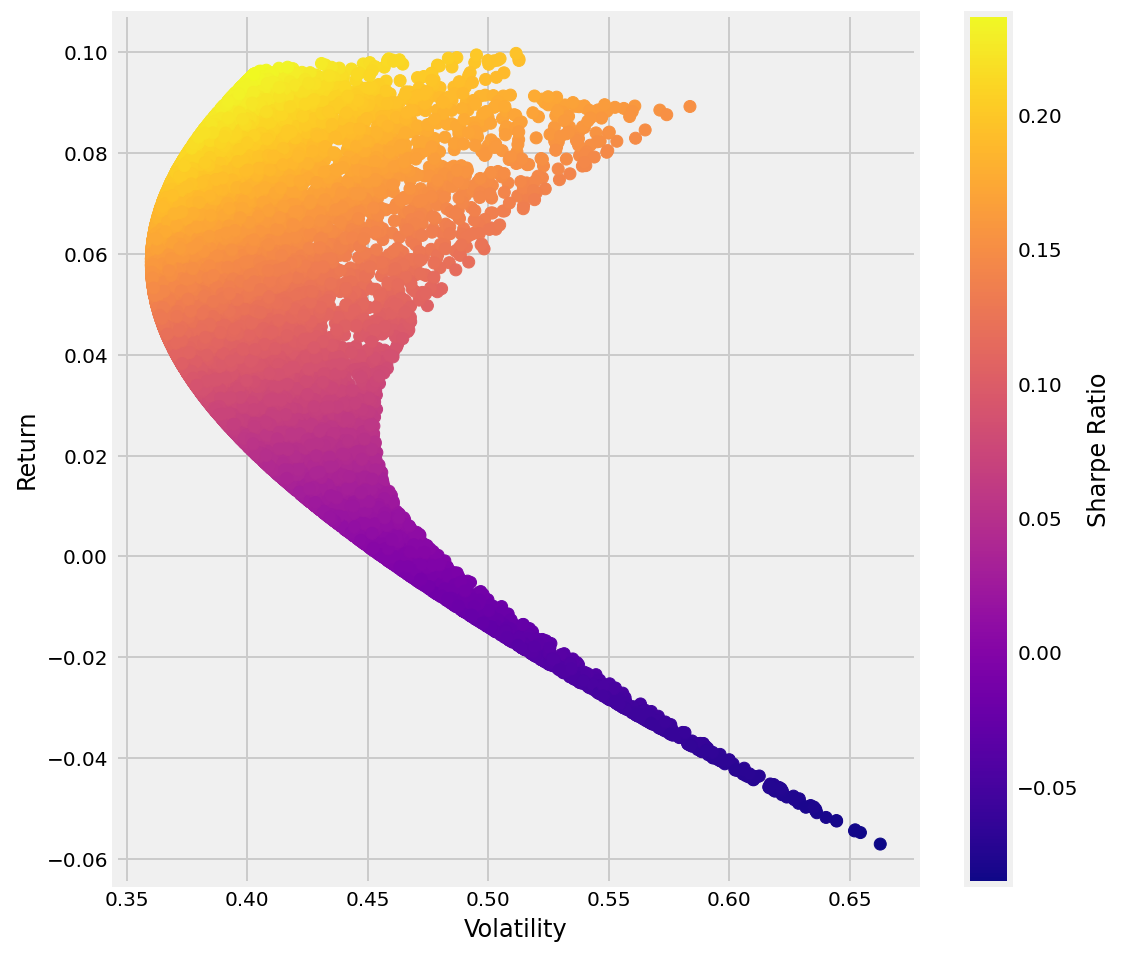

In [67]:
# plot the data
plt.figure(figsize=(8,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [68]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

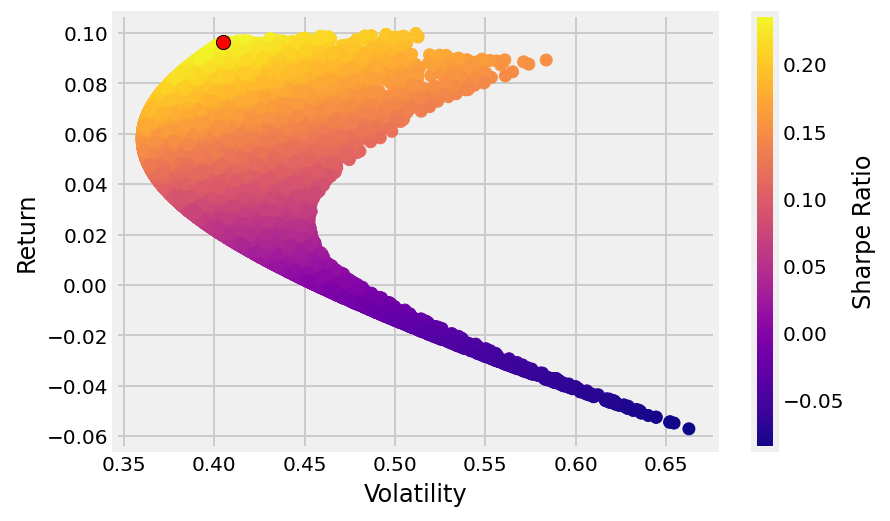

In [69]:
# plot the dataplt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')